# Project on Bank Customer Churn

##### Introduction: This notebook explores the "Bank Customer Churn" dataset to analyze customer churn and derive insights to help the bank improve customer retention strategies. Customer churn refers to the phenomenon where customers discontinue their relationship with a company or stop using its products or services. Understanding the factors that contribute to churn is crucial for businesses to retain customers and maintain long-term profitability.

##### Goal: The goal of this analysis is to understand the factors influencing customer churn in the bank. By exploring various features such as customer demographics, financial attributes, and behavioral patterns, the aim is to build a predictive model to identify key drivers of customer churn. The analysis seeks to uncover insights that can help in retaining customers and improving overall customer satisfaction.

# Loading libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [637]:
cc=pd.read_csv(r"C:\Users\nisha\OneDrive\Documents\Datasets\Bank\Bank_Customer_Churn_2.csv")

In [638]:
cc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Complain,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,2,DIAMOND,464,Yes,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,3,DIAMOND,456,Yes,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,3,DIAMOND,377,Yes,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,5,GOLD,350,No,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,5,GOLD,425,No,No


# Checking for Nulls

In [639]:
cc.isnull().sum()[cc.isnull().sum()>0]

Series([], dtype: int64)

# Checking Duplicate Records

In [640]:
duplicated_rows = cc.duplicated()
print(cc[duplicated_rows])

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Satisfaction Score, Card Type, Point Earned, Complain, Exited]
Index: []


In [641]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  object 
 11  IsActiveMember      10000 non-null  object 
 12  EstimatedSalary     10000 non-null  float64
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
 16  Compl

# Dropping unwanted columns

In [642]:
cc=cc.drop(columns={'CustomerId','RowNumber','Surname'},axis=1)

In [643]:
for columns in cc.columns:
     cc.rename(columns={columns: columns.replace(' ', '_')}, inplace=True)

In [644]:
cc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction_Score,Card_Type,Point_Earned,Complain,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,2,DIAMOND,464,Yes,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,3,DIAMOND,456,Yes,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,3,DIAMOND,377,Yes,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,5,GOLD,350,No,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,5,GOLD,425,No,No


In [645]:
cc.shape

(10000, 15)

# Data Visualisation

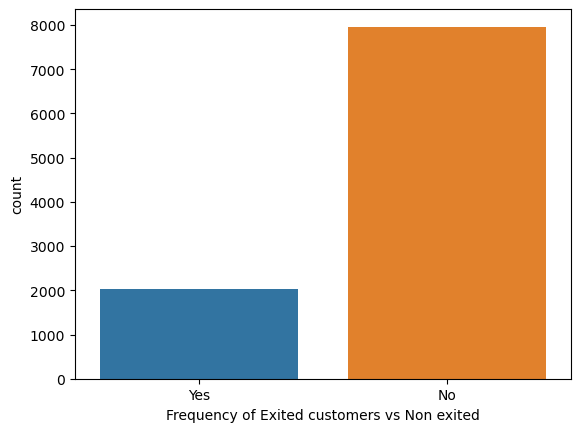

In [646]:
sns.countplot(data=cc, x='Exited')
plt.xlabel('Frequency of Exited customers vs Non exited')
plt.show()

### The frequency of Exited customers is less than that of retained customers

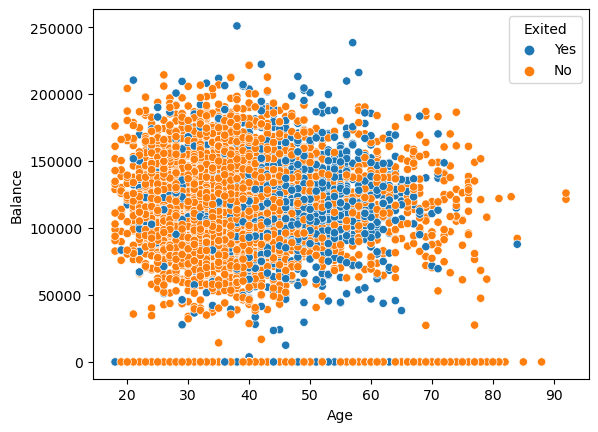

In [647]:
sns.scatterplot(data=cc, x='Age', y='Balance', hue='Exited');

### Scatter plot of Age and Balance : There seems to be a positive correlation between age and account balance. This means that, as customer age increases, their account balance tends to be higher. The orange and blue dots show a general upward trend on the plot.

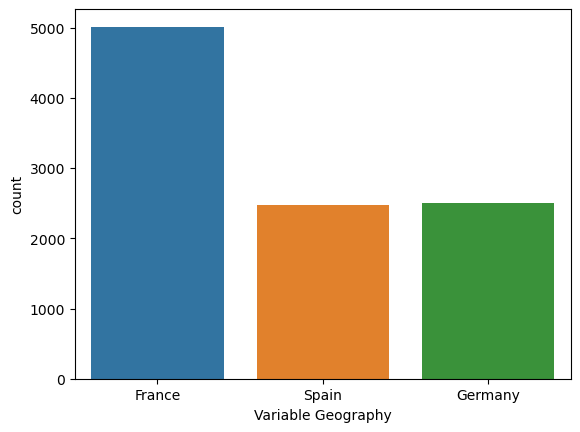

In [648]:
sns.countplot(data=cc, x='Geography')
plt.xlabel('Variable Geography')
plt.show()

In [649]:
cc.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

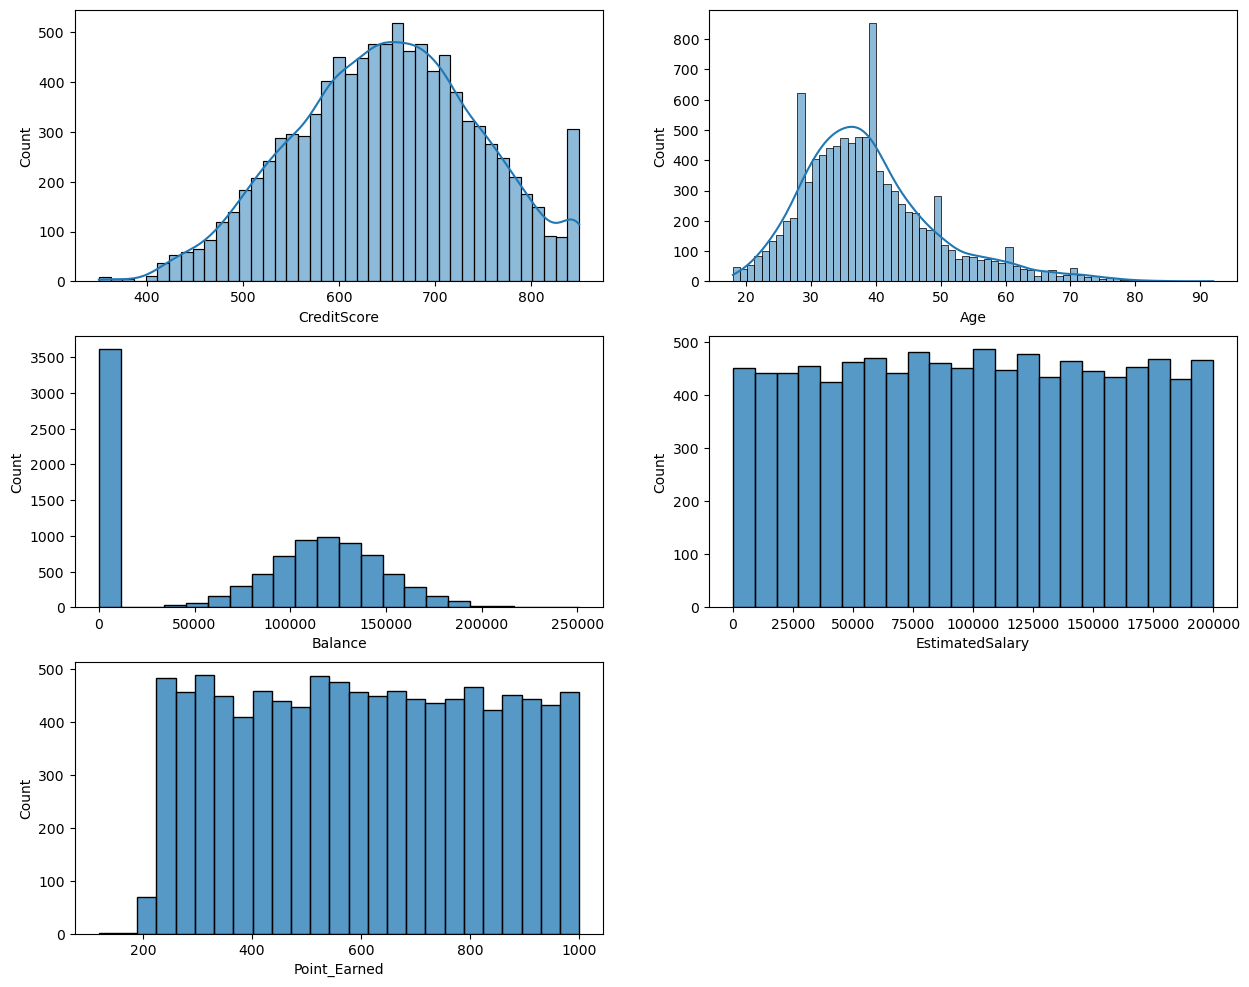

In [650]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = cc['CreditScore'], kde = True)

plt.subplot(3, 2, 2)
sns.histplot(x = cc['Age'], kde = True)

plt.subplot(3, 2, 3)
sns.histplot(x = cc['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = cc['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = cc['Point_Earned'], kde = False);

#### Looking at our continuous variables we can see that most of the variables are well balanced, like the estimated salary we can see that we have practically the same number of people for each salary range, the same thing for the PointEarned variable, when we look at the variable CreditScore and Age we can see that they have practically the same behavior, a imperfect distribution, and when we look at the balance variable we can see that most of our data are from people who don't have money in their accounts, and those who have it are fine balanced.


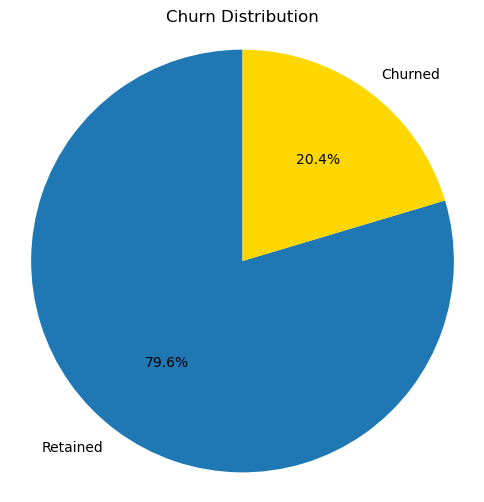

In [651]:
plt.figure(figsize=(6, 6))
churn_counts = cc['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90,colors=['#1f78b4', '#ffd700'])
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

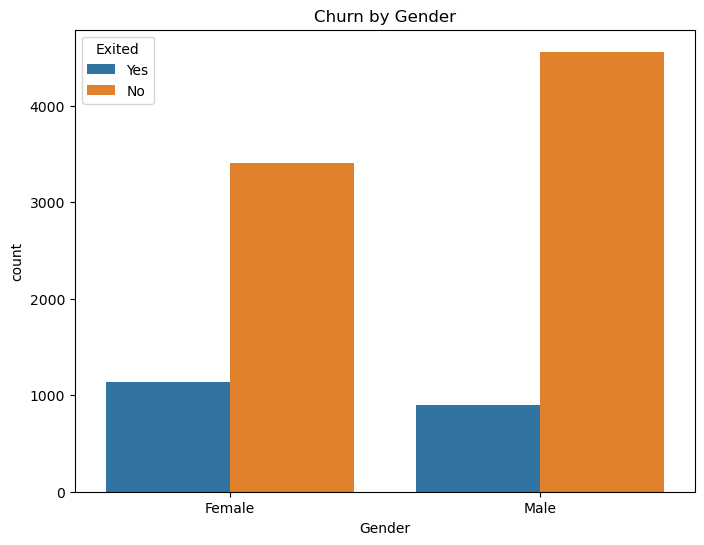

In [652]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=cc)
plt.title('Churn by Gender')
plt.show()

### This plot indicates that Female customers are more likely to be churned.

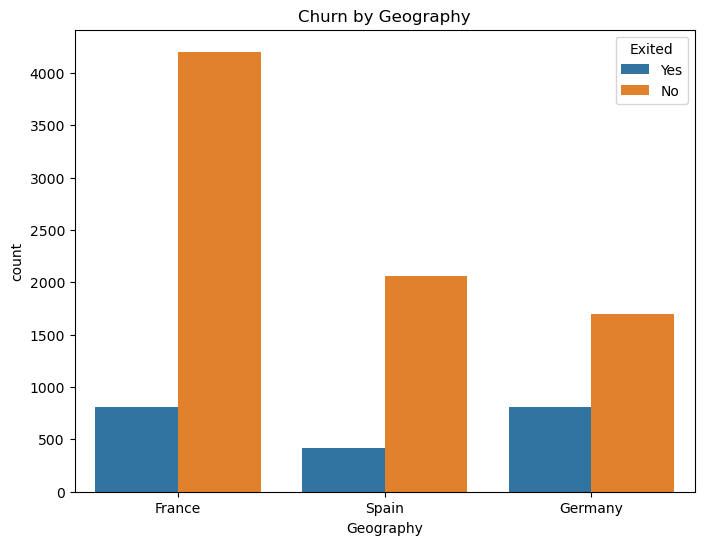

In [653]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=cc)
plt.title('Churn by Geography')
plt.show()

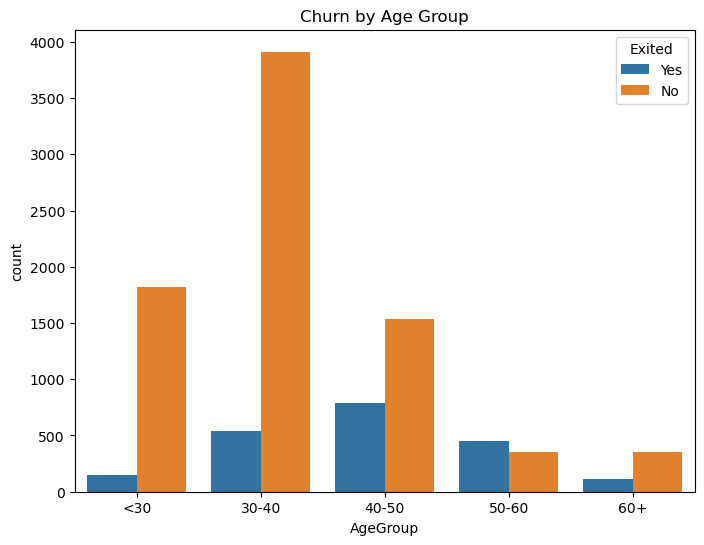

In [654]:
cc['AgeGroup'] = pd.cut(cc['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=cc)
plt.title('Churn by Age Group')
plt.show()

### Age group of 40-50 and 50-60 indicates more customers are to be churned compare to other age groups and that of age 30-40 and <30 displays customers that are more likely to be retained.

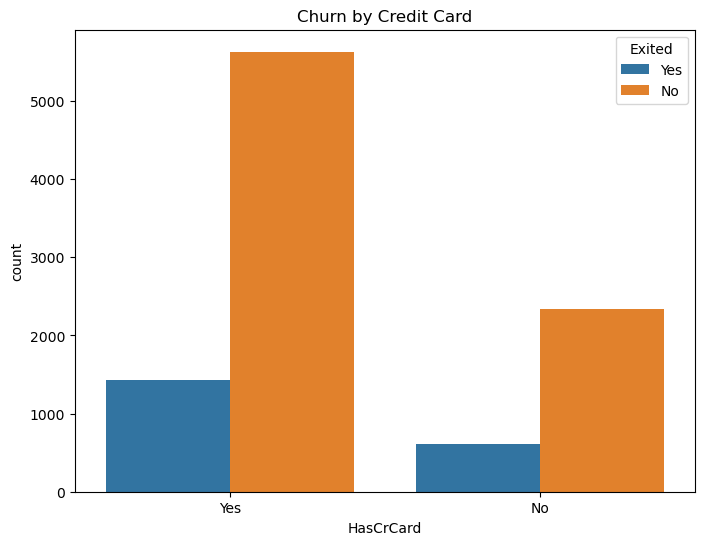

In [655]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=cc)
plt.title('Churn by Credit Card')
plt.show()

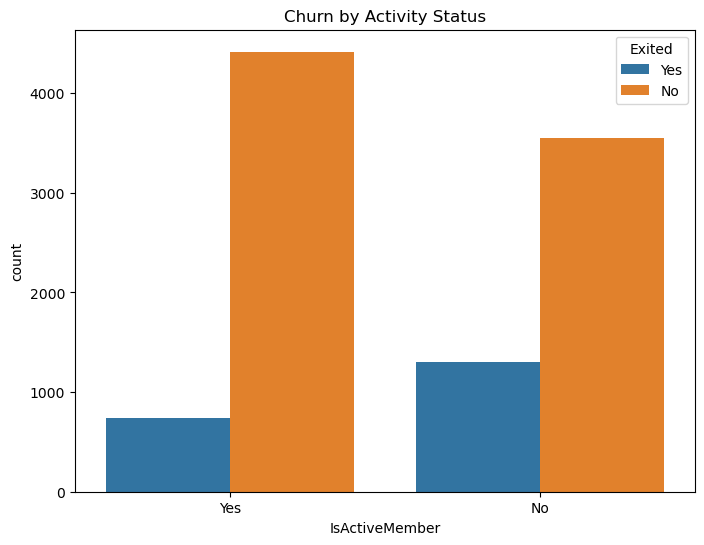

In [656]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=cc)
plt.title('Churn by Activity Status')
plt.show()

### Active members tend to have a higher possibilityof staying compared to inactive members

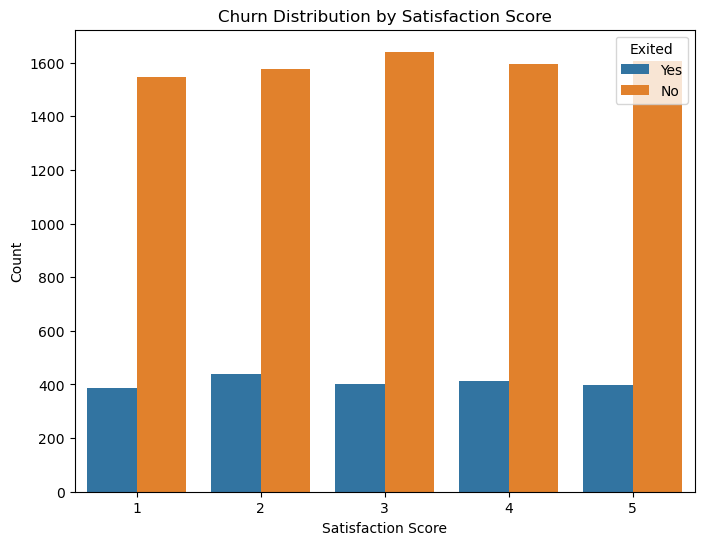

In [657]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cc, x='Satisfaction_Score', hue='Exited')
plt.title('Churn Distribution by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.show()

### There appears to be no significant correlation between satisfaction scores and customer churn. Higher satisfaction scores do not seem to have a impact on reducing churn rates.

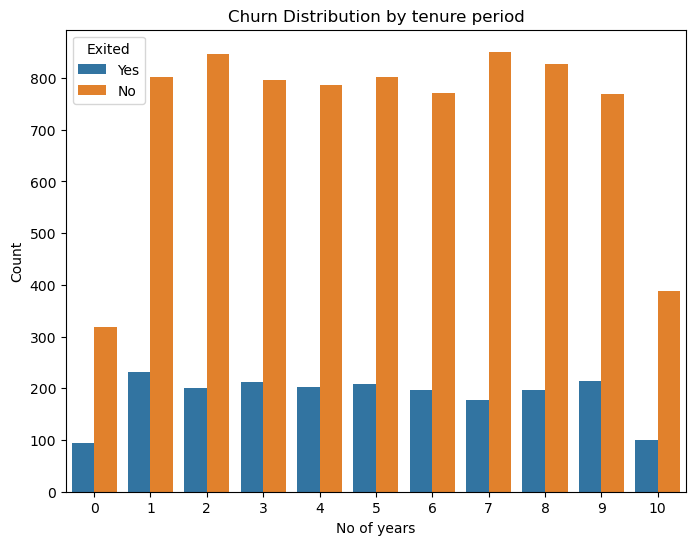

In [658]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cc, x='Tenure', hue='Exited')
plt.title('Churn Distribution by tenure period')
plt.xlabel('No of years')
plt.ylabel('Count')
plt.show()

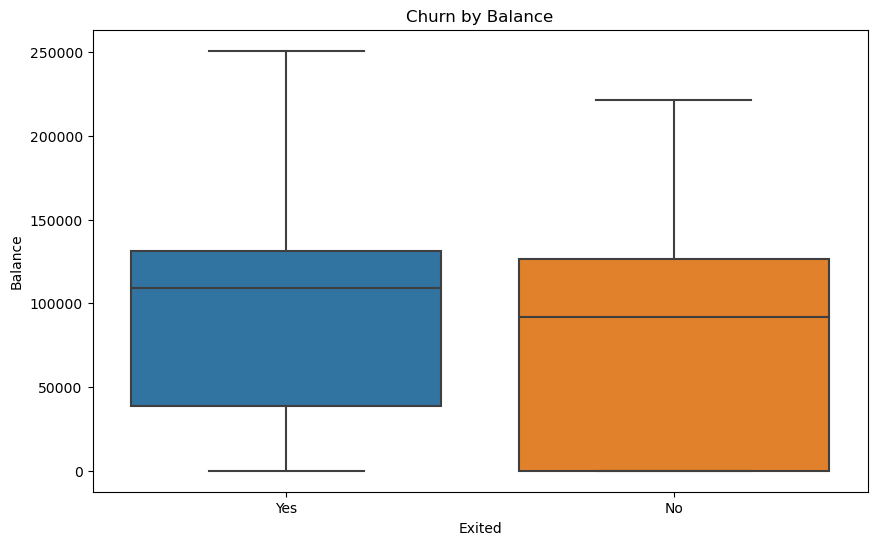

In [659]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=cc)
plt.title('Churn by Balance')
plt.show()

In [660]:
cc.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction_Score,Point_Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


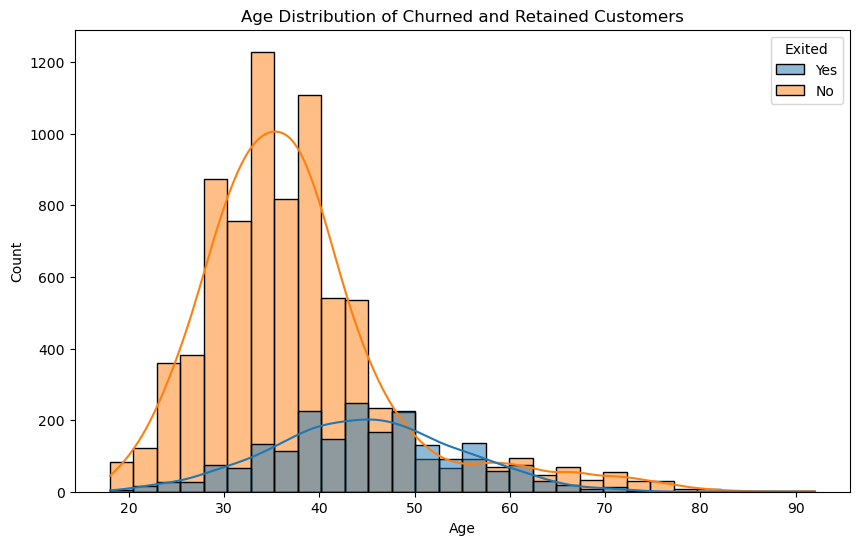

In [661]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cc, x='Age', hue='Exited', element='bars', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Insight: The age distribution of churned individuals appears right-skewed, indicating that the probability of older individuals not churning is higher.

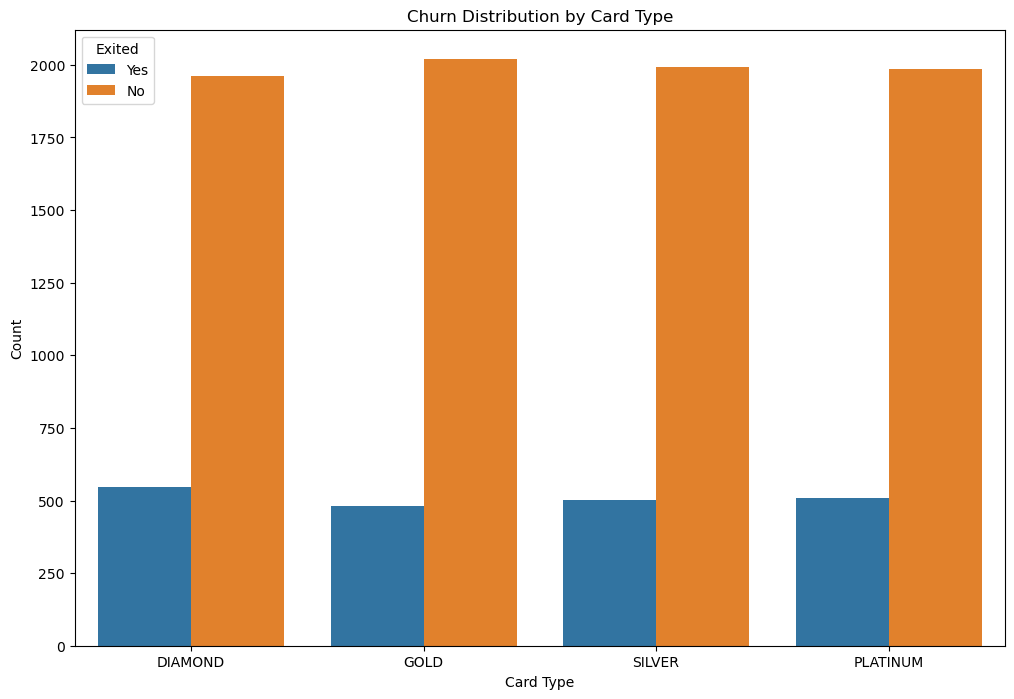

In [662]:
plt.figure(figsize=(12, 8))
sns.countplot(data=cc, x='Card_Type', hue='Exited', order=['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'])
plt.title('Churn Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.show()

###  There appears to be no significant effect of Card Type on customer churn or retention.

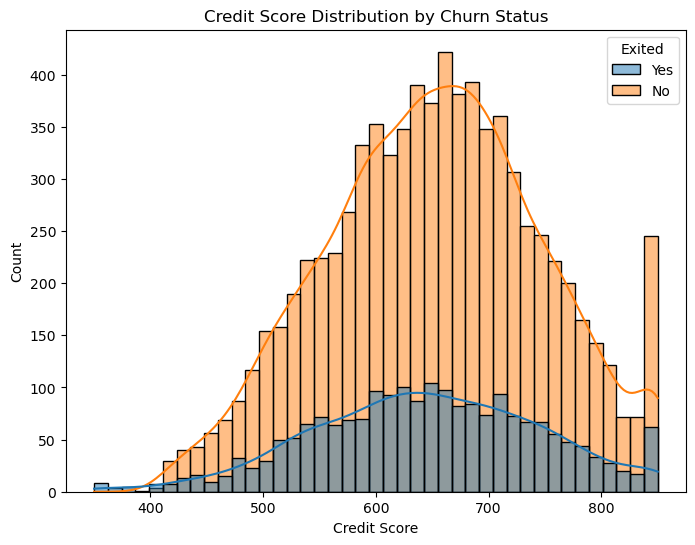

In [663]:
plt.figure(figsize=(8, 6))
sns.histplot(cc, x='CreditScore', hue='Exited', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

#### Customers with lower credit scores (400-500 range) show a higher tendency to churn, indicating a likelihood for churn among this group. Customers with higher credit scores (700-800 range) exhibit a greater tendency to stay with the service, suggesting higher retention rates .

In [664]:
cc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction_Score,Card_Type,Point_Earned,Complain,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,2,DIAMOND,464,Yes,Yes,40-50
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,3,DIAMOND,456,Yes,No,40-50
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,3,DIAMOND,377,Yes,Yes,40-50
3,699,France,Female,39,1,0.00,2,No,No,93826.63,5,GOLD,350,No,No,30-40
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,5,GOLD,425,No,No,40-50


# Data Cleaning and Preprocessing

In [665]:
cc.Card_Type=cc.Card_Type.replace({'DIAMOND':2, 'GOLD':1, 'SILVER':0, 'PLATINUM':3})

In [666]:
cc.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [667]:
cc.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [668]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [669]:
cc[cc.select_dtypes(include='object').columns]=cc[cc.select_dtypes(include='object').columns].apply(le.fit_transform)

In [670]:
# cc=cc.drop('AgeGroup',axis=1)

In [671]:
cc.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction_Score,Card_Type,Point_Earned,Complain,Exited,AgeGroup
0,619,0,0,42,2,0.00,1,1,1,101348.88,2,2,464,1,1,40-50
1,608,2,0,41,1,83807.86,1,0,1,112542.58,3,2,456,1,0,40-50
2,502,0,0,42,8,159660.80,3,1,0,113931.57,3,2,377,1,1,40-50
3,699,0,0,39,1,0.00,2,0,0,93826.63,5,1,350,0,0,30-40
4,850,2,0,43,2,125510.82,1,1,1,79084.10,5,1,425,0,0,40-50


In [672]:
cc.Gender.value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [673]:
cc.Geography.value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [674]:
# Churn rate by gender
churn_rate_gender = cc.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)

Gender
0    0.250715
1    0.164743
Name: Exited, dtype: float64


### Based on the provided dataset, the churn rate by gender is as follows:

Female: 25.1%
Male: 16.5% This means that the churn rate for female customers is higher (25.1%) compared to male customers (16.5%).

In [675]:
# Churn rate by geography
churn_rate_geography = cc.groupby('Geography')['Exited'].mean()
print(churn_rate_geography)

# France   :  0
# Germany  :  1
# Spain    :  2

Geography
0    0.161747
1    0.324432
2    0.166734
Name: Exited, dtype: float64


### This indicates that the churn rate is highest in Germany (32.4%), followed by Spain (16.7%) and France (16.2%)

In [676]:
churn_rate_age = cc.groupby('AgeGroup')['Exited'].mean()
print(churn_rate_age)

AgeGroup
<30      0.075203
30-40    0.121096
40-50    0.339655
50-60    0.562108
60+      0.247845
Name: Exited, dtype: float64


### These churn rates indicate that the highest churn rate is observed in the 50-60 age group (56.2%), followed by the 40-50 age group (33.9%). The lowest churn rate is observed in the <30 age group (7.5%).

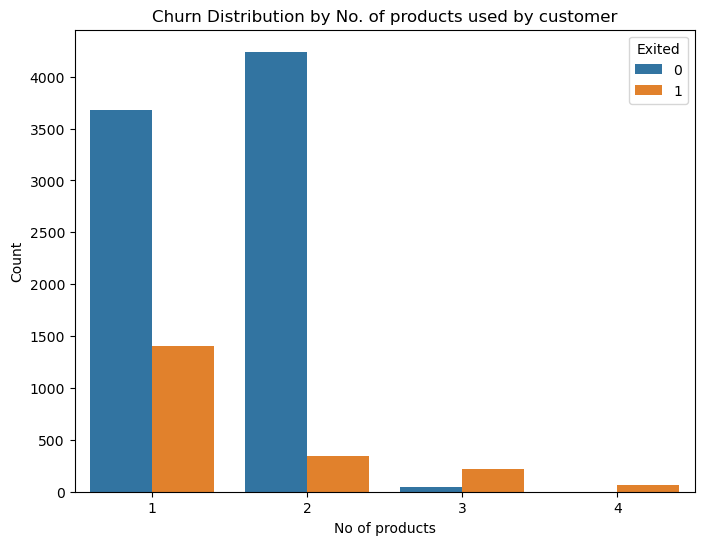

In [677]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cc, x='NumOfProducts', hue='Exited')
plt.title('Churn Distribution by No. of products used by customer')
plt.xlabel('No of products')
plt.ylabel('Count')
plt.show()

In [678]:
churn_percentage_by_product_count = cc.groupby('NumOfProducts')['Exited'].mean() * 100
print("Churn Percentage by Number of Products:")
print(churn_percentage_by_product_count)

Churn Percentage by Number of Products:
NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


### Customers with a higher number of products (3 or 4) exhibit a higher probability of churn. Conversely, customers with only 2 products have a lower chance of leaving the bank compared to those with just 1 product.

In [679]:
cc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction_Score,Card_Type,Point_Earned,Complain,Exited,AgeGroup
0,619,0,0,42,2,0.00,1,1,1,101348.88,2,2,464,1,1,40-50
1,608,2,0,41,1,83807.86,1,0,1,112542.58,3,2,456,1,0,40-50
2,502,0,0,42,8,159660.80,3,1,0,113931.57,3,2,377,1,1,40-50
3,699,0,0,39,1,0.00,2,0,0,93826.63,5,1,350,0,0,30-40
4,850,2,0,43,2,125510.82,1,1,1,79084.10,5,1,425,0,0,40-50


In [680]:
cc=cc.drop(['AgeGroup'],axis=1)

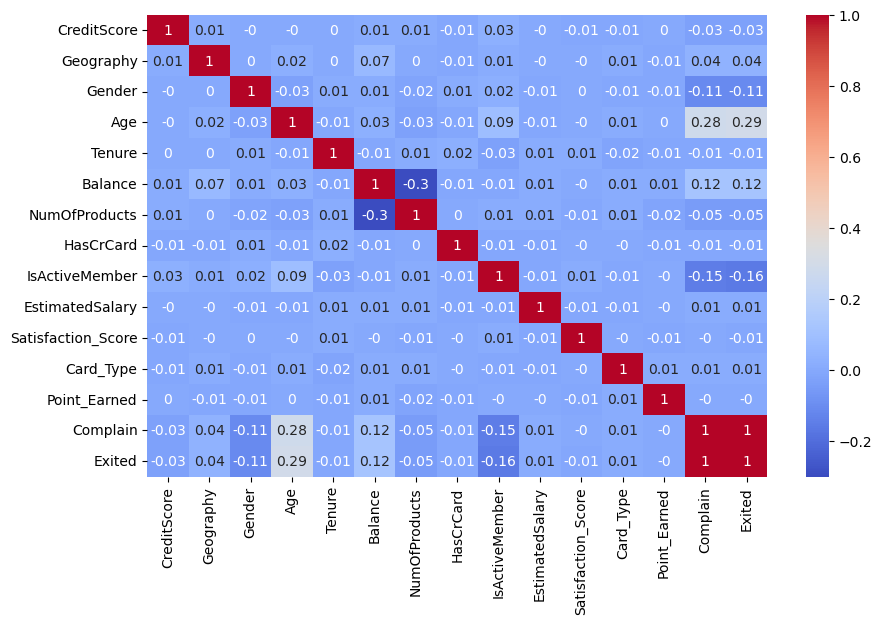

In [681]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(cc.corr().round(2),annot=True,cmap='coolwarm');

### Here, looking at the correlation of our variables, we can see that we have 100% correlation between the target variables and the Complain variable, so dropping the Complain variable.

#### looking at the exploratory analysis we can verify that a good part of the our data are well distributed, we can see some peculiarities such as the majority of customers are from France, usually between 1 and 2 products, a good part of our customers do not have money in their account, and we can see that the age of our customers meets a distribution normal, a very important thing we saw is that our Target variable is unbalanced

In [682]:
cc=cc.drop(['Complain'],axis=1)

In [683]:
from sklearn.model_selection import train_test_split

In [684]:
cc_train,cc_test=train_test_split(cc,test_size=.2)

In [685]:
cc_train.Exited.value_counts()

Exited
0    6374
1    1626
Name: count, dtype: int64

In [686]:
df1=cc_train[cc_train.Exited==1]
cc_train=pd.concat([cc_train,df1,df1])
cc_train.shape

(11252, 14)

In [687]:
cc_train.Exited.value_counts()

Exited
0    6374
1    4878
Name: count, dtype: int64

In [688]:
cc.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction_Score,Card_Type,Point_Earned,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,2,2,464,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,3,2,456,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,3,2,377,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,5,1,350,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,5,1,425,0


In [689]:
cc_train_x = cc_train.loc[:, cc_train.columns!= 'Exited']
cc_train_y=cc_train.iloc[:,-1]

cc_test_x=cc_test.loc[:, cc_train.columns!= 'Exited']
cc_test_y=cc_test.iloc[:,-1]

# Model Building

# Logistic Regression

In [690]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [691]:
logreg.fit(cc_train_x,cc_train_y)

LogisticRegression()

In [692]:
pred_train_log=logreg.predict(cc_train_x)
pred_test_log=logreg.predict(cc_test_x)

In [693]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score,f1_score,classification_report

Text(0.5, 1.0, 'Logistic Regression')

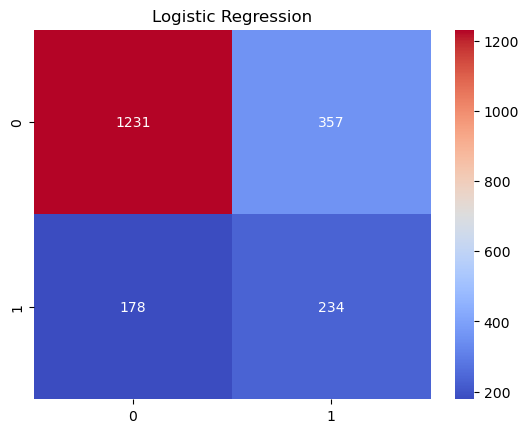

In [694]:
sns.heatmap(confusion_matrix(cc_test_y,pred_test_log), annot=True, fmt='d', cmap='coolwarm').set_title('Logistic Regression')

In [695]:
#          [1591,   45],
#          [ 340,   24]]
# without oversampling
# Tpr-->0.06
# Fpr-->0.02
# Precision-->0.34
# Accuracy--> 0.80

In [696]:
precision_score(cc_test_y,pred_test_log)

0.39593908629441626

In [697]:
recall_score(cc_test_y,pred_test_log)

0.5679611650485437

In [698]:
accuracy_score(cc_test_y,pred_test_log)


0.7325

In [699]:
f1_score(cc_test_y,pred_test_log)

0.4666001994017946

In [700]:
from sklearn.metrics import roc_auc_score,roc_curve

In [701]:
pred_prob_test=logreg.predict_proba(cc_test_x)
len(pred_prob_test)

2000

In [702]:
roc_auc_score(cc_test_y,pred_prob_test[:,1]) #area under the curve value

0.7336990413538431

In [703]:
fpr,tpr,thre=roc_curve(cc_test_y,pred_prob_test[:,1])


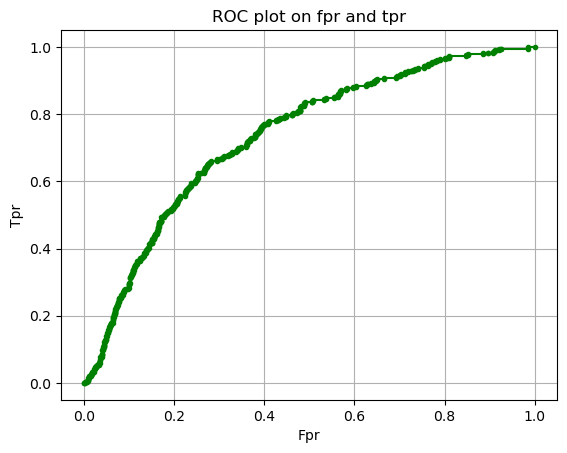

In [704]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

# Decision Tree

In [705]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [706]:
from sklearn.model_selection import GridSearchCV

In [707]:
search_dict={"criterion":["gini","entropy"],
            "max_depth":range(4,9),
            "min_samples_split":[50,75,100]}
grid=GridSearchCV(dt,param_grid=search_dict)
grid.fit(cc_train_x, cc_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 75, 100]})

In [708]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 50}

In [709]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=50)

In [710]:
dt1.fit(cc_train_x,cc_train_y)

DecisionTreeClassifier(max_depth=8, min_samples_split=50)

In [711]:
pred_test_2=dt1.predict(cc_test_x)
pred_train_2=dt1.predict(cc_train_x)

Text(0.5, 1.0, 'Decision Tree Classifier')

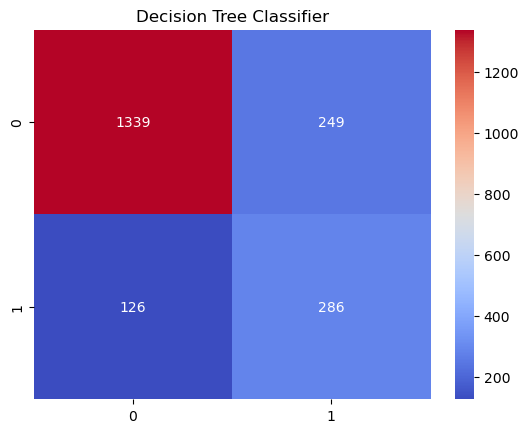

In [712]:
sns.heatmap(confusion_matrix(cc_test_y,pred_test_2), annot=True, fmt='d', cmap='coolwarm').set_title('Decision Tree Classifier')

In [713]:
#       [1557,   35],
#       [ 259,  149]
# without oversampling
# Tpr-->0.36
# Fpr-->0.02
# Precision-->0.80
# Accuracy-->0.85

In [714]:
print(classification_report(cc_test_y,pred_test_2))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1588
           1       0.53      0.69      0.60       412

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [715]:
accuracy_score(cc_test_y,pred_test_2)

0.8125

In [716]:
precision_score(cc_test_y,pred_test_2)

0.5345794392523364

In [717]:
recall_score(cc_test_y,pred_test_2)

0.6941747572815534

In [718]:
f1_score(cc_test_y,pred_test_2)

0.604012671594509

In [719]:
pred_prob_test_dt1=dt1.predict_proba(cc_test_x)
len(pred_prob_test_dt1)

2000

In [720]:
roc_auc_score(cc_test_y,pred_prob_test_dt1[:,1]) #area under the curve value

0.8344172617446384

In [721]:
fpr,tpr,thre=roc_curve(cc_test_y,pred_prob_test_dt1[:,1])


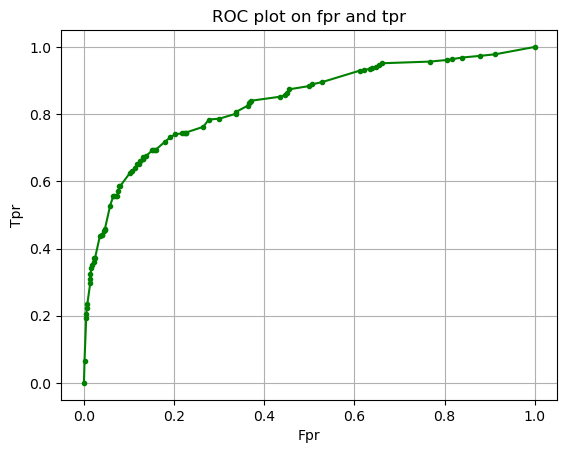

In [722]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

# Ada Boost

In [723]:
from sklearn.ensemble import AdaBoostClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=50)
abc=AdaBoostClassifier(dt,n_estimators=50)

In [724]:
abc.fit(cc_train_x,cc_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=8,
                                                    min_samples_split=50))

In [725]:
pred_abc=abc.predict(cc_test_x)

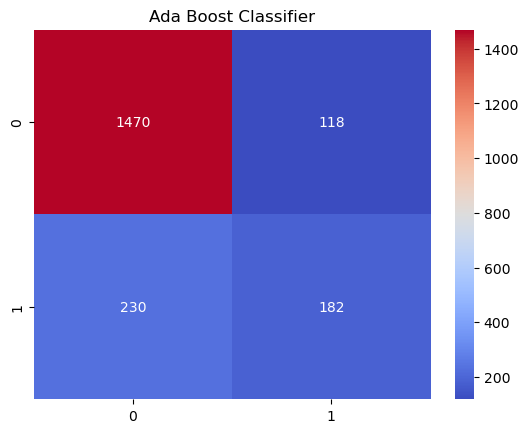

In [726]:
sns.heatmap(confusion_matrix(cc_test_y,pred_abc), annot=True, fmt='d', cmap='coolwarm').set_title('Ada Boost Classifier');

In [727]:
print(classification_report(cc_test_y,pred_abc))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1588
           1       0.61      0.44      0.51       412

    accuracy                           0.83      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.81      0.83      0.82      2000



In [728]:
accuracy_score(cc_test_y,pred_abc)

0.826

In [729]:
recall_score(cc_test_y,pred_abc)

0.441747572815534

In [730]:
precision_score(cc_test_y,pred_abc)

0.6066666666666667

In [731]:
f1_score(cc_test_y,pred_abc)

0.5112359550561798

# Random Forest Classifier

In [732]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=100)
rfc.fit(cc_train_x ,cc_train_y)

RandomForestClassifier(criterion='entropy', min_samples_split=100)

In [733]:
rfc_pred=rfc.predict(cc_test_x)

Text(0.5, 1.0, 'Random Forest Classifier')

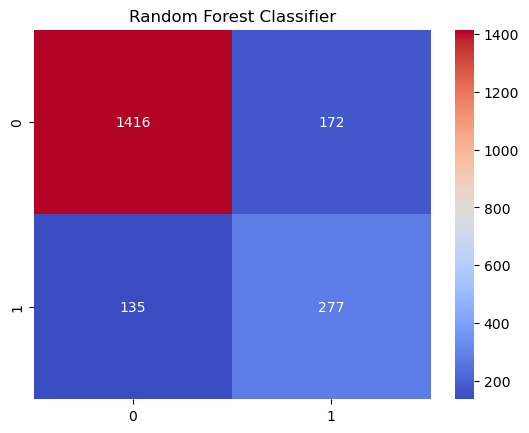

In [734]:
sns.heatmap(confusion_matrix(cc_test_y,rfc_pred), annot=True, fmt='d', cmap='coolwarm').set_title('Random Forest Classifier')

In [735]:
#        [1547,   45],
#        [ 239,  169]
# without oversampling
# Tpr-->0.41
# Fpr-->0.02
# Precision-->0.78
# Accuracy-->0.85

In [736]:
print(classification_report(cc_test_y,rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1588
           1       0.62      0.67      0.64       412

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000



In [737]:
accuracy_score(cc_test_y ,rfc_pred)

0.8465

In [738]:
recall_score(cc_test_y ,rfc_pred)

0.6723300970873787

In [739]:
precision_score(cc_test_y ,rfc_pred)

0.6169265033407573

In [740]:
f1_score(cc_test_y ,rfc_pred)

0.6434378629500581

# SVM

In [741]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')

In [742]:
svm.fit(cc_train_x,cc_train_y)

SVC(kernel='sigmoid')

In [743]:
pred=svm.predict(cc_test_x)

Text(0.5, 1.0, 'SVM')

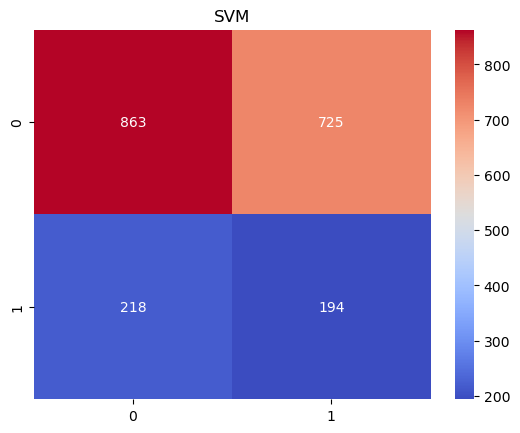

In [744]:
sns.heatmap(confusion_matrix(cc_test_y,pred), annot=True, fmt='d', cmap='coolwarm').set_title('SVM')

In [745]:
#       [1280,  312],
#      [ 325,   83]
# without oversampling
# Tpr-->0.20
# Fpr-->0.19
# Precision-->0.21
# Accuracy-->0.71

In [746]:
accuracy_score(cc_test_y ,pred)

0.5285

In [747]:
recall_score(cc_test_y ,pred)

0.470873786407767

In [748]:
f1_score(cc_test_y ,pred)

0.2915101427498122

In [749]:
precision_score(cc_test_y ,pred)

0.21109902067464636

# Naive Bayes

In [750]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [751]:
nb.fit(cc_train_x ,cc_train_y)

MultinomialNB()

In [752]:
pred_nb=nb.predict(cc_test_x)

Text(0.5, 1.0, 'Naive Bayes')

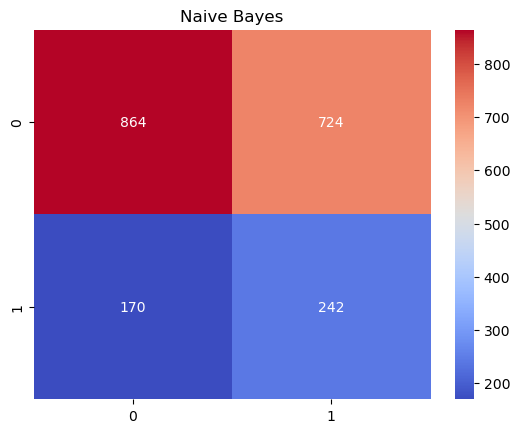

In [753]:
sns.heatmap(confusion_matrix(cc_test_y,pred_nb), annot=True, fmt='d', cmap='coolwarm').set_title('Naive Bayes')

In [754]:
#        [[915, 677],
#        [196, 212]]
# without oversampling
# Tpr-->0.51
# Fpr-->0.42
# Precision-->0.23
# Accuracy-->0.59

In [755]:
accuracy_score(cc_test_y ,pred_nb)

0.553

In [756]:
recall_score(cc_test_y ,pred_nb)

0.587378640776699

In [757]:
precision_score(cc_test_y ,pred_nb)

0.2505175983436853

In [758]:
f1_score(cc_test_y ,pred_nb)

0.35123367198838895

# Model with Annova and Chi-Sqaured

In [3]:
cc=pd.read_csv(r"C:\Users\nisha\OneDrive\Documents\Datasets\Bank\Bank_Customer_Churn_2.csv")

In [4]:
cc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,Complain,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,2,DIAMOND,464,Yes,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,3,DIAMOND,456,Yes,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,3,DIAMOND,377,Yes,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,5,GOLD,350,No,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,5,GOLD,425,No,No


# Checking for Nulls

In [5]:
cc.isnull().sum()[cc.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
duplicated_rows = cc.duplicated()
print(cc[duplicated_rows])

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Satisfaction Score, Card Type, Point Earned, Complain, Exited]
Index: []


In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  object 
 11  IsActiveMember      10000 non-null  object 
 12  EstimatedSalary     10000 non-null  float64
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
 16  Compl

# Dropping unwanted columns

In [8]:
cc=cc.drop(columns={'CustomerId','RowNumber','Surname'},axis=1)

In [9]:
for columns in cc.columns:
     cc.rename(columns={columns: columns.replace(' ', '_')}, inplace=True)

In [10]:
cc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction_Score,Card_Type,Point_Earned,Complain,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,2,DIAMOND,464,Yes,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,3,DIAMOND,456,Yes,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,3,DIAMOND,377,Yes,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,5,GOLD,350,No,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,5,GOLD,425,No,No


In [11]:
cc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction_Score,Card_Type,Point_Earned,Complain,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,2,DIAMOND,464,Yes,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,3,DIAMOND,456,Yes,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,3,DIAMOND,377,Yes,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,5,GOLD,350,No,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,5,GOLD,425,No,No


In [12]:
numerical= cc.iloc[:, [0, 3, 4, 5, 6, 9, 10, 12]]
categorical= cc.drop(numerical.columns, axis=1)

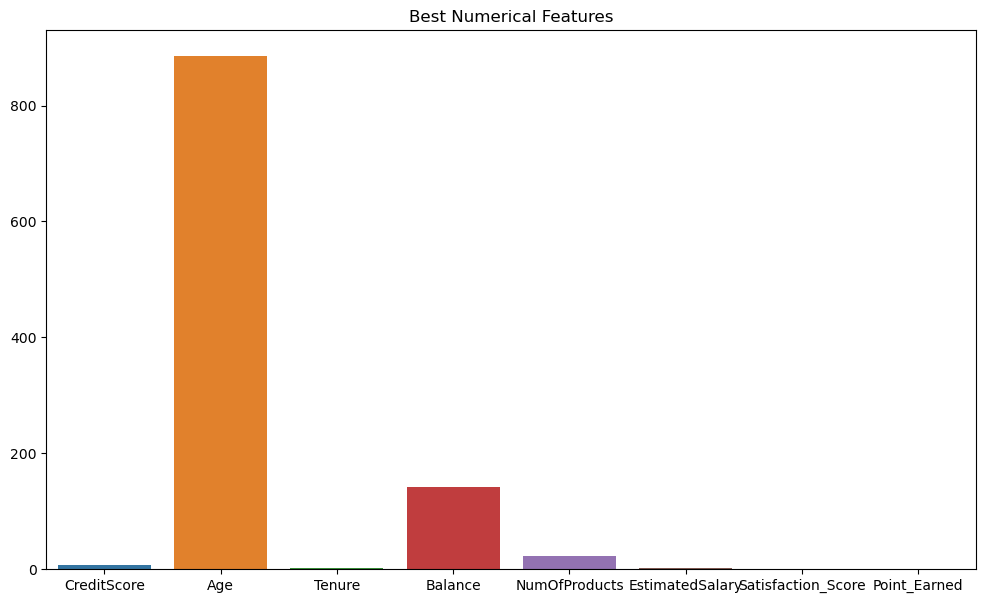

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = cc.iloc[:, [0, 3, 4, 5, 6, 9, 10, 12]]
target_column = cc['Exited']

n = SelectKBest(score_func=f_classif, k=10)
numcols = n.fit_transform(numerical_columns, target_column)
selected_scores = n.scores_[n.get_support(indices=True)]
selected_numerical_features = numerical_columns.columns[n.get_support(indices=True)]
# Plot the scores
plt.figure(figsize=(12, 7))
sns.barplot(x=selected_numerical_features, y=selected_scores)
plt.title('Best Numerical Features')
plt.show()


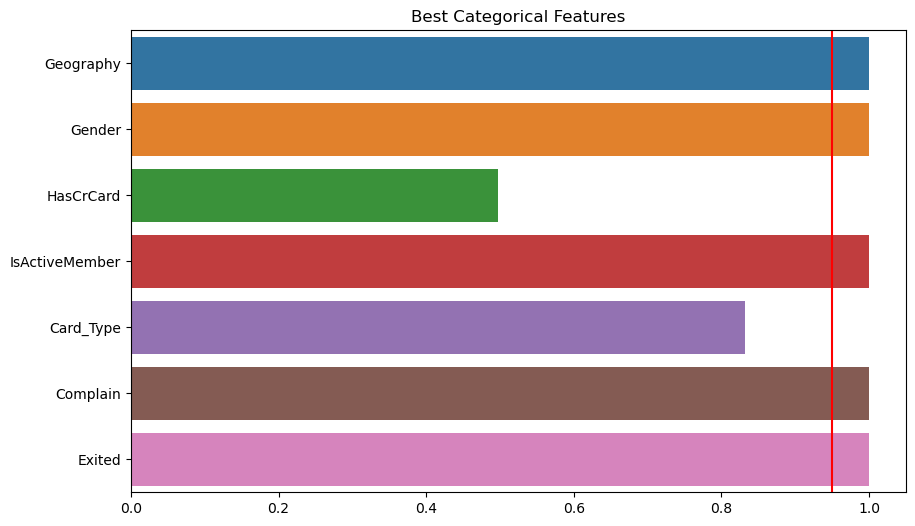

In [14]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = cc.drop(numerical_columns.columns, axis=1)

# Perform Chi-Square test and store p-values
p_values = [1 - chi2_contingency(pd.crosstab(cc['Exited'], cc[i]))[1] for i in categorical_columns]

plt.figure(figsize=(10, 6))
sns.barplot(x=p_values, y=categorical_columns.columns)
plt.title('Best Categorical Features')
plt.axvline(x=(1 - 0.05), color='r')
plt.show()



In [15]:
l3=['Age','Balance','NumOfProducts','CreditScore','Geography','Gender','IsActiveMember','Exited']

In [16]:
# Assuming 'cc' is your DataFrame and 'l3' is a list of column names to keep
cc=cc[l3]
cc

,Age,Balance,NumOfProducts,CreditScore,Geography,Gender,IsActiveMember,Exited
0,42,0.00,1,619,France,Female,Yes,Yes
1,41,83807.86,1,608,Spain,Female,Yes,No
2,42,159660.80,3,502,France,Female,No,Yes
3,39,0.00,2,699,France,Female,No,No
4,43,125510.82,1,850,Spain,Female,Yes,No
...,...,...,...,...,...,...,...,...
9995,39,0.00,2,771,France,Male,No,No
9996,35,57369.61,1,516,France,Male,Yes,No
9997,36,0.00,1,709,France,Female,Yes,Yes
9998,42,75075.31,2,772,Germany,Male,No,Yes


In [17]:
cc.shape

(10000, 8)

# Data Cleaning and Preprocessing

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
cc[cc.select_dtypes(include='object').columns]=cc[cc.select_dtypes(include='object').columns].apply(le.fit_transform)

In [20]:
# cc=cc.drop('AgeGroup',axis=1)

In [21]:
cc.head(5)

,Age,Balance,NumOfProducts,CreditScore,Geography,Gender,IsActiveMember,Exited
0,42,0.00,1,619,0,0,1,1
1,41,83807.86,1,608,2,0,1,0
2,42,159660.80,3,502,0,0,0,1
3,39,0.00,2,699,0,0,0,0
4,43,125510.82,1,850,2,0,1,0


In [22]:
cc.head()

,Age,Balance,NumOfProducts,CreditScore,Geography,Gender,IsActiveMember,Exited
0,42,0.00,1,619,0,0,1,1
1,41,83807.86,1,608,2,0,1,0
2,42,159660.80,3,502,0,0,0,1
3,39,0.00,2,699,0,0,0,0
4,43,125510.82,1,850,2,0,1,0


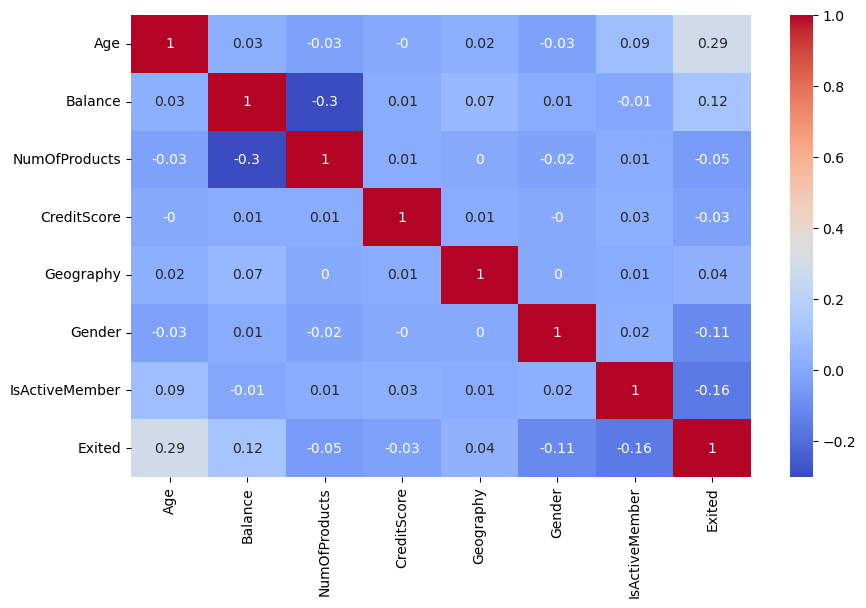

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(cc.corr().round(2),annot=True,cmap='coolwarm');

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
cc_train,cc_test=train_test_split(cc,test_size=.2)

In [26]:
cc_train.Exited.value_counts()

Exited
0    6374
1    1626
Name: count, dtype: int64

In [27]:
df1=cc_train[cc_train.Exited==1]
cc_train=pd.concat([cc_train,df1,df1,df1])
cc_train.shape

(12878, 8)

In [28]:
cc_train.Exited.value_counts()

Exited
1    6504
0    6374
Name: count, dtype: int64

In [29]:
cc_train_x = cc_train.loc[:, cc_train.columns!= 'Exited']
cc_train_y=cc_train.iloc[:,-1]

cc_test_x=cc_test.loc[:, cc_train.columns!= 'Exited']
cc_test_y=cc_test.iloc[:,-1]

# Model Building

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [31]:
logreg.fit(cc_train_x,cc_train_y)

LogisticRegression()

In [32]:
pred_train_log=logreg.predict(cc_train_x)
pred_test_log=logreg.predict(cc_test_x)

In [56]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score,f1_score,classification_report

Text(0.5, 1.0, 'Logistic Regression')

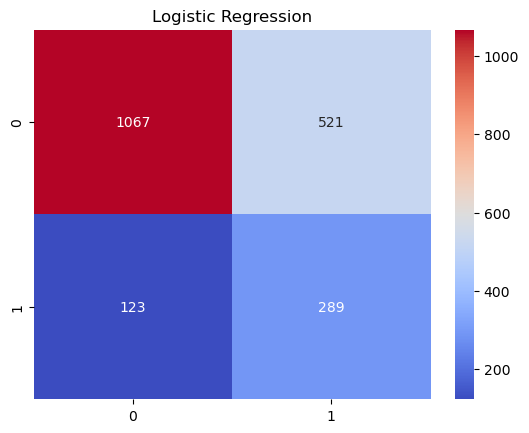

In [34]:
sns.heatmap(confusion_matrix(cc_test_y,pred_test_log), annot=True, fmt='d', cmap='coolwarm').set_title('Logistic Regression')

In [35]:
#          [1591,   45],
#          [ 340,   24]]
# without oversampling
# Tpr-->0.06
# Fpr-->0.02
# Precision-->0.34
# Accuracy--> 0.80

In [36]:
precision_score(cc_test_y,pred_test_log)

0.3567901234567901

In [37]:
recall_score(cc_test_y,pred_test_log)

0.7014563106796117

In [38]:
accuracy_score(cc_test_y,pred_test_log)


0.678

In [39]:
f1_score(cc_test_y,pred_test_log)

0.47299509001636664

In [40]:
from sklearn.metrics import roc_auc_score,roc_curve

In [41]:
pred_prob_test=logreg.predict_proba(cc_test_x)
len(pred_prob_test)

2000

In [42]:
roc_auc_score(cc_test_y,pred_prob_test[:,1]) #area under the curve value

0.7443454855591696

In [43]:
fpr,tpr,thre=roc_curve(cc_test_y,pred_prob_test[:,1])

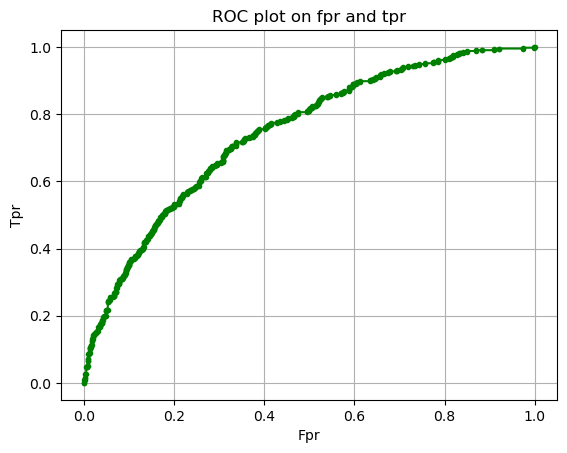

In [44]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt3=DecisionTreeClassifier()

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
search_dict={"criterion":["gini","entropy"],
            "max_depth":range(4,9),
            "min_samples_split":[50,75,100]}
grid=GridSearchCV(dt3,param_grid=search_dict)
grid.fit(cc_train_x, cc_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 75, 100]})

In [48]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 50}

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt4=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=50)

In [50]:
dt4.fit(cc_train_x,cc_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=50)

In [51]:
pred_test_4=dt4.predict(cc_test_x)
pred_train_4=dt4.predict(cc_train_x)

Text(0.5, 1.0, 'Decision Tree Classifier')

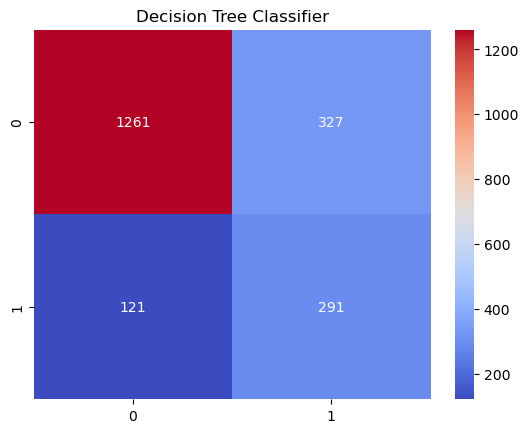

In [52]:
sns.heatmap(confusion_matrix(cc_test_y,pred_test_4), annot=True, fmt='d', cmap='coolwarm').set_title('Decision Tree Classifier')

In [53]:
#       [1557,   35],
#       [ 259,  149]
# without oversampling
# Tpr-->0.36
# Fpr-->0.02
# Precision-->0.80
# Accuracy-->0.85

In [57]:
print(classification_report(cc_test_y,pred_test_4))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1588
           1       0.47      0.71      0.57       412

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.82      0.78      0.79      2000



In [58]:
accuracy_score(cc_test_y,pred_test_4)

0.776

In [59]:
precision_score(cc_test_y,pred_test_4)

0.470873786407767

In [60]:
recall_score(cc_test_y,pred_test_4)

0.7063106796116505

In [61]:
f1_score(cc_test_y,pred_test_4)

0.5650485436893203

In [62]:
pred_prob_test_dt4=dt4.predict_proba(cc_test_x)
len(pred_prob_test_dt4)

2000

In [63]:
roc_auc_score(cc_test_y,pred_prob_test_dt4[:,1]) #area under the curve value

0.818875944584383

In [64]:
fpr,tpr,thre=roc_curve(cc_test_y,pred_prob_test_dt4[:,1])

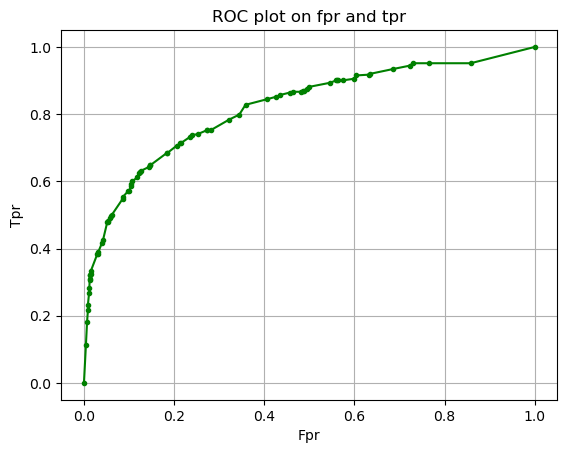

In [65]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

# Ada Boost

In [66]:
from sklearn.ensemble import AdaBoostClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=50)
abc=AdaBoostClassifier(dt,n_estimators=50)

In [67]:
abc.fit(cc_train_x,cc_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                    min_samples_split=50))

In [68]:
pred_abc=abc.predict(cc_test_x)

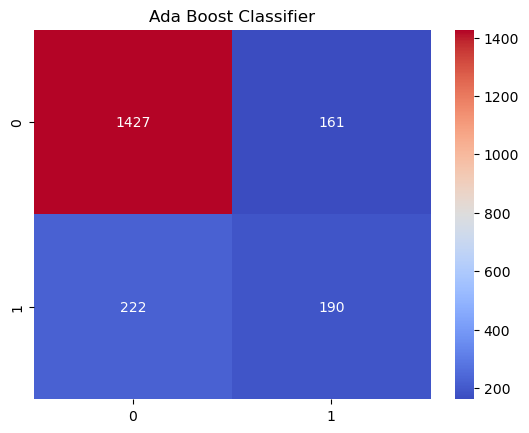

In [69]:
sns.heatmap(confusion_matrix(cc_test_y,pred_abc), annot=True, fmt='d', cmap='coolwarm').set_title('Ada Boost Classifier');

In [70]:
accuracy_score(cc_test_y,pred_abc)

0.8085

In [71]:
recall_score(cc_test_y,pred_abc)44

0.46116504854368934

In [72]:
precision_score(cc_test_y,pred_abc)

0.5413105413105413

In [73]:
f1_score(cc_test_y,pred_abc)

0.4980340760157274

# Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc2=RandomForestClassifier(criterion='entropy',min_samples_split=50)
rfc2.fit(cc_train_x ,cc_train_y)

RandomForestClassifier(criterion='entropy', min_samples_split=50)

In [75]:
rfc_pred2=rfc2.predict(cc_test_x)

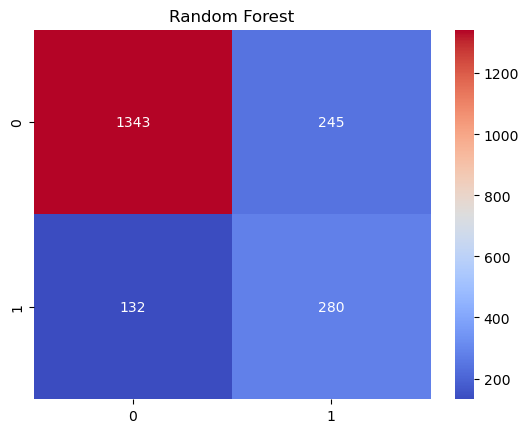

In [76]:
sns.heatmap(confusion_matrix(cc_test_y,rfc_pred2), annot=True, fmt='d', cmap='coolwarm').set_title('Random Forest');

In [77]:
#        [1547,   45],
#        [ 239,  169]
# without oversampling
# Tpr-->0.41
# Fpr-->0.02
# Precision-->0.78
# Accuracy-->0.85

In [78]:
print(classification_report(cc_test_y,rfc_pred2))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1588
           1       0.53      0.68      0.60       412

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.81      0.82      2000



In [79]:
accuracy_score(cc_test_y ,rfc_pred2)

0.8115

In [80]:
recall_score(cc_test_y ,rfc_pred2)

0.6796116504854369

In [81]:
precision_score(cc_test_y ,rfc_pred2)

0.5333333333333333

In [82]:
f1_score(cc_test_y ,rfc_pred2)

0.5976520811099253

# SVM

In [83]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')

In [84]:
svm.fit(cc_train_x,cc_train_y)

SVC(kernel='sigmoid')

In [85]:
pred=svm.predict(cc_test_x)

Text(0.5, 1.0, 'SVM')

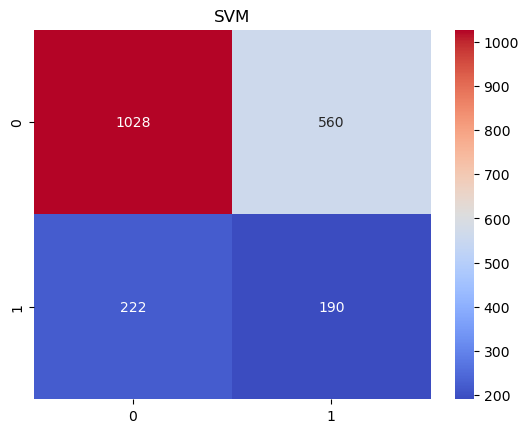

In [86]:
sns.heatmap(confusion_matrix(cc_test_y,pred), annot=True, fmt='d', cmap='coolwarm').set_title('SVM')

In [87]:
#       [1280,  312],
#      [ 325,   83]
# without oversampling
# Tpr-->0.20
# Fpr-->0.19
# Precision-->0.21
# Accuracy-->0.71

In [88]:
accuracy_score(cc_test_y ,pred)

0.609

In [89]:
recall_score(cc_test_y ,pred)

0.46116504854368934

In [90]:
f1_score(cc_test_y ,pred)

0.3270223752151463

In [91]:
precision_score(cc_test_y ,pred)

0.25333333333333335

# Naive Bayes

In [92]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [93]:
nb.fit(cc_train_x ,cc_train_y)

MultinomialNB()

In [94]:
pred_nb=nb.predict(cc_test_x)

Text(0.5, 1.0, 'Naive Bayes')

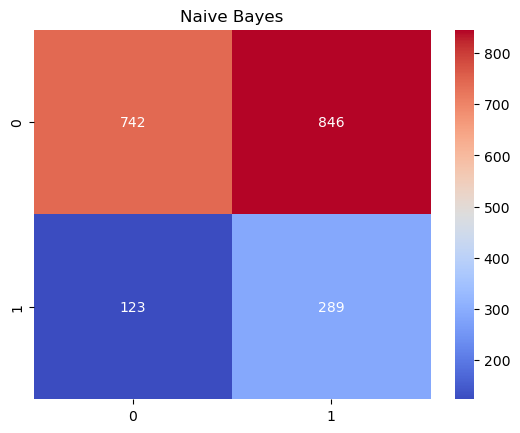

In [95]:
sns.heatmap(confusion_matrix(cc_test_y,pred_nb), annot=True, fmt='d', cmap='coolwarm').set_title('Naive Bayes')

In [96]:
#        [[915, 677],
#        [196, 212]]
# without oversampling
# Tpr-->0.51
# Fpr-->0.42
# Precision-->0.23
# Accuracy-->0.59

In [97]:
accuracy_score(cc_test_y ,pred_nb)

0.5155

In [98]:
recall_score(cc_test_y ,pred_nb)

0.7014563106796117

In [99]:
precision_score(cc_test_y ,pred_nb)

0.25462555066079295

In [100]:
f1_score(cc_test_y ,pred_nb)

0.37362637362637363

# Conclusion


#### Insights provide a clear understanding of churn drivers: age, credit score, tenure, and product usage. Implementation of these insights can aid in devising targeted retention strategies and enhancing customer satisfaction.

#### Recommendations: 1. Leverage insights to tailor retention programs for different customer segments. 2.Focus on enhancing services for higher product usage customers to reduce churn. 3.Continuous monitoring and adaptation of strategies based on ongoing data analysis.

#### After balancing our Target class and running the Machine Learning models we got some good results and some not so much, most of the models had a satisfactory result learning both the negative result and the positive result, and others learned only the negative result and not the our objective result, in terms of accuracy, the best model was the Random Forest with 84.7%, also to predict the target variable.